In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 

# 1. 분석데이터 불러오기 및 확인

In [2]:
data = pd.read_csv('Market_Basket.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(data[j][i]) 
                         for j in range(data.shape[1]-data.isnull().sum(axis=1)[i])])

In [4]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

# 2. apriori 모델 적용

In [ ]:
# !pip install apyori

In [5]:
from apyori import apriori

In [6]:
rules = apriori(transactions, min_support = 0.015, min_confidence = 0.2,  
                min_lift = 1, min_length = 1)

In [7]:
results = list(rules) 

In [8]:
results

[RelationRecord(items=frozenset({'mineral water'}), support=0.23836821757099053, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'mineral water'}), confidence=0.23836821757099053, lift=1.0)]),
 RelationRecord(items=frozenset({'burgers', 'eggs'}), support=0.02879616051193174, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'eggs'}), confidence=0.33027522935779813, lift=1.8378297443715457)]),
 RelationRecord(items=frozenset({'burgers', 'french fries'}), support=0.021997067057725635, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'french fries'}), confidence=0.25229357798165136, lift=1.4761732671141707)]),
 RelationRecord(items=frozenset({'burgers', 'green tea'}), support=0.0174643380882549, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'green tea'}), confidence=0.2003058103975535, lift=1.5161391360161947)]),
 RelationR

In [9]:
print(len(results))

78


In [10]:
df=pd.DataFrame(results)
df

,items,support,ordered_statistics
0,(mineral water),0.238368,"[((), (mineral water), 0.23836821757099053, 1.0)]"
1,"(burgers, eggs)",0.028796,"[((burgers), (eggs), 0.33027522935779813, 1.83..."
2,"(burgers, french fries)",0.021997,"[((burgers), (french fries), 0.252293577981651..."
3,"(burgers, green tea)",0.017464,"[((burgers), (green tea), 0.2003058103975535, ..."
4,"(burgers, milk)",0.017864,"[((burgers), (milk), 0.20489296636085627, 1.58..."
...,...,...,...
73,"(spaghetti, tomatoes)",0.020931,"[((tomatoes), (spaghetti), 0.3060428849902534,..."
74,"(spaghetti, turkey)",0.016531,"[((turkey), (spaghetti), 0.26439232409381663, ..."
75,"(spaghetti, chocolate, mineral water)",0.015865,"[((chocolate, mineral water), (spaghetti), 0.3..."
76,"(spaghetti, mineral water, ground beef)",0.017064,"[((mineral water, ground beef), (spaghetti), 0..."


In [11]:
df.to_csv('apriori_result.csv')

In [12]:
print(df.iloc[6:19][['items','support']]) 

                             items   support
6             (burgers, spaghetti)  0.021464
7                     (eggs, cake)  0.019064
8             (cake, french fries)  0.017864
9            (mineral water, cake)  0.027463
10               (spaghetti, cake)  0.018131
11        (mineral water, chicken)  0.022797
12            (spaghetti, chicken)  0.017198
13               (chocolate, eggs)  0.033196
14           (chocolate, escalope)  0.017598
15       (chocolate, french fries)  0.034395
16  (frozen vegetables, chocolate)  0.022930
17        (chocolate, ground beef)  0.023064
18               (milk, chocolate)  0.032129


# 3. 연관품목의 시각화

In [13]:
ar=(df.iloc[1:74]['items'])

In [14]:
ar

1                       (burgers, eggs)
2               (burgers, french fries)
3                  (burgers, green tea)
4                       (burgers, milk)
5              (burgers, mineral water)
                    ...                
69    (mineral water, whole wheat rice)
70               (olive oil, spaghetti)
71                (spaghetti, pancakes)
72                  (spaghetti, shrimp)
73                (spaghetti, tomatoes)
Name: items, Length: 73, dtype: object

In [15]:
df = pd.DataFrame(list(ar), columns=['FROM', 'TO'])

In [16]:
df.head()

,FROM,TO
0,burgers,eggs
1,burgers,french fries
2,burgers,green tea
3,burgers,milk
4,burgers,mineral water


In [17]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [18]:
G = nx.from_pandas_edgelist(df, source = 'FROM', target = 'TO')

In [19]:
# 한글 폰트 설정
ko_font_location = "C:/Windows/Fonts/malgun.ttf"
ko_font_name = font_manager.FontProperties(fname=ko_font_location).get_name()

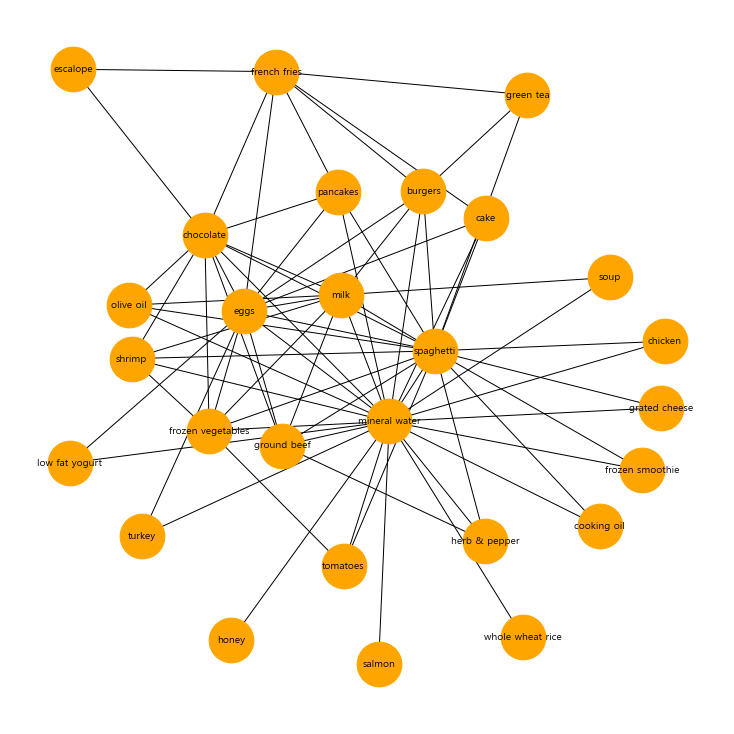

In [20]:
# 품목 연관 시각화
plt.figure(figsize=(10,10)) 
nx.draw_kamada_kawai(G)
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G, pos, font_family=ko_font_name, font_size=10, font_color='black')
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=2000, alpha=1)
plt.show()